In [ ]:
#import additional libraries
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#for splitting the data into training and test set
from sklearn.model_selection import train_test_split
# For Normalization
from sklearn.preprocessing import MinMaxScaler
# Confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
# import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
print(tf.__version__)

2.13.0


## Load Data

In [ ]:
#Loaing from the course github account
df=pd.read_csv('https://ml-datasets.nyc3.digitaloceanspaces.com/binary-class-data/education/student-dropout.csv', index_col=0)
df.head()

,Student ID,Student Name,Library,Resources,Finance,Scholarships,Study Time,Study Group,GPA,Test,Assignment,Graduated
0,1324,David Abbott,Average,Online,Paid,No,Average,Tier 3,2.07,5.1,9.1,Drop out
1,1325,John Ward,Poor,Online,Unpaid,No,Excellent,Tier 1,1.96,10.9,7.8,Drop out
2,1326,Sarah James,Good,Online,Paid,No,Poor,Tier 2,3.77,9.3,6.6,Graduated
3,1327,John Zhang,Good,Offline,Paid,No,Average,Tier 1,1.82,14.6,6.2,Drop out
4,1328,Holly Leonard,Poor,Hybrid,Paid,No,Poor,Tier 1,3.22,14.6,10.9,Graduated


## Analyze the Data

In [ ]:
def get_data_correlation(df, column_name=''):
  if column_name:
    print(df.corr()[column_name])
  else:
    print(df.corr())

get_data_correlation(df)


            Student ID       GPA      Test  Assignment
Student ID    1.000000 -0.001862 -0.001784    0.000462
GPA          -0.001862  1.000000 -0.001451    0.000369
Test         -0.001784 -0.001451  1.000000    0.000103
Assignment    0.000462  0.000369  0.000103    1.000000


<ipython-input-4-c5503fe81e5a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


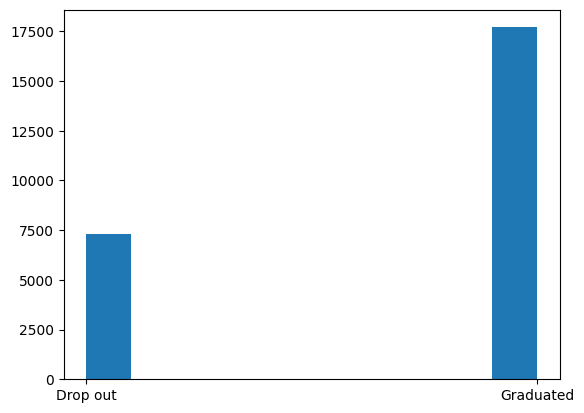

In [ ]:
plt.hist(df['Graduated'])
plt.show()

## Clean Data

In [ ]:
def num_missing_records(df):
  num = df.isnull().sum()
  print(f'Num missing records:\n{num}')
  return num

num_missing_records(df)


Num missing records:
Student ID      0
Student Name    0
Library         0
Resources       0
Finance         0
Scholarships    0
Study Time      0
Study Group     0
GPA             0
Test            0
Assignment      0
Graduated       0
dtype: int64


Student ID      0
Student Name    0
Library         0
Resources       0
Finance         0
Scholarships    0
Study Time      0
Study Group     0
GPA             0
Test            0
Assignment      0
Graduated       0
dtype: int64

In [ ]:
def drop_irrelevant_columns(df, columns):
  try:
    return df.drop(columns=columns)
  except:
    return df

df =drop_irrelevant_columns(df, ['Student ID', 'Student Name'])
df.head()



,Library,Resources,Finance,Scholarships,Study Time,Study Group,GPA,Test,Assignment,Graduated
0,Average,Online,Paid,No,Average,Tier 3,2.07,5.1,9.1,Drop out
1,Poor,Online,Unpaid,No,Excellent,Tier 1,1.96,10.9,7.8,Drop out
2,Good,Online,Paid,No,Poor,Tier 2,3.77,9.3,6.6,Graduated
3,Good,Offline,Paid,No,Average,Tier 1,1.82,14.6,6.2,Drop out
4,Poor,Hybrid,Paid,No,Poor,Tier 1,3.22,14.6,10.9,Graduated


## Numericize Data

In [ ]:
def convert_labels_to_numbers(df, column_name):
  uniques = df[column_name].unique()
  values = [*range(0, len(uniques))]
  return df[column_name].replace(uniques, values)

df['Graduated'] = convert_labels_to_numbers(df, 'Graduated')
df.head()


,Library,Resources,Finance,Scholarships,Study Time,Study Group,GPA,Test,Assignment,Graduated
0,Average,Online,Paid,No,Average,Tier 3,2.07,5.1,9.1,0
1,Poor,Online,Unpaid,No,Excellent,Tier 1,1.96,10.9,7.8,0
2,Good,Online,Paid,No,Poor,Tier 2,3.77,9.3,6.6,1
3,Good,Offline,Paid,No,Average,Tier 1,1.82,14.6,6.2,0
4,Poor,Hybrid,Paid,No,Poor,Tier 1,3.22,14.6,10.9,1


In [ ]:
def convert_categorical_variables_to_numeric_values(df):
  df = pd.get_dummies(df, drop_first=True)
  return df
df = convert_categorical_variables_to_numeric_values(df)
df.head()


,GPA,Test,Assignment,Graduated,Library_Excellent,Library_Good,Library_Poor,Resources_Offline,Resources_Online,Finance_Unpaid,Scholarships_Yes,Study Time_Excellent,Study Time_Good,Study Time_Poor,Study Group_Tier 2,Study Group_Tier 3
0,2.07,5.1,9.1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1.96,10.9,7.8,0,0,0,1,0,1,1,0,1,0,0,0,0
2,3.77,9.3,6.6,1,0,1,0,0,1,0,0,0,0,1,1,0
3,1.82,14.6,6.2,0,0,1,0,1,0,0,0,0,0,0,0,0
4,3.22,14.6,10.9,1,0,0,1,0,0,0,0,0,0,1,0,0


## Split Data

In [ ]:
X = df.drop('Graduated', axis=1)
y = df['Graduated']



## Scale Data

In [ ]:
scaler = MinMaxScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_norm.head()


,GPA,Test,Assignment,Library_Excellent,Library_Good,Library_Poor,Resources_Offline,Resources_Online,Finance_Unpaid,Scholarships_Yes,Study Time_Excellent,Study Time_Good,Study Time_Poor,Study Group_Tier 2,Study Group_Tier 3
0,0.2675,0.01,0.41,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2400,0.59,0.28,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.6925,0.43,0.16,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.2050,0.96,0.12,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5550,0.96,0.59,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)


## Build Model

In [ ]:
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
#model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
500/500 [==============================] - 2s 2ms/step - loss: 0.4416 - accuracy: 0.7746 - val_loss: 0.2887 - val_accuracy: 0.9035
Epoch 2/50
500/500 [==============================] - 1s 3ms/step - loss: 0.2198 - accuracy: 0.9295 - val_loss: 0.1663 - val_accuracy: 0.9463
Epoch 3/50
500/500 [==============================] - 1s 2ms/step - loss: 0.1414 - accuracy: 0.9644 - val_loss: 0.1186 - val_accuracy: 0.9750
Epoch 4/50
500/500 [==============================] - 1s 2ms/step - loss: 0.1057 - accuracy: 0.9777 - val_loss: 0.0921 - val_accuracy: 0.9868
Epoch 5/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9844 - val_loss: 0.0779 - val_accuracy: 0.9850
Epoch 6/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9881 - val_loss: 0.0676 - val_accuracy: 0.9860
Epoch 7/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0640 - accuracy: 0.9900 - val_loss: 0.0590 - val_accuracy: 0.9923
Epoch 

## Evaluate Model

In [ ]:
y_pred = model.predict(X_test)
y_pred = [0 if val < 0.5 else 1 for val in y_pred]

157/157 [==============================] - 0s 2ms/step


In [ ]:
eval_model=model.evaluate(X_test, y_test)
eval_model

157/157 [==============================] - 1s 2ms/step - loss: 0.0169 - accuracy: 0.9948


[0.01687674969434738, 0.9947999715805054]

In [ ]:
eval = confusion_matrix(y_test, y_pred)
print(eval)

[[1453   21]
 [   5 3521]]


In [ ]:
y_pred = model.predict(X_test).flatten()
y_pred = np.round(y_pred).astype(int)
y_pred


157/157 [==============================] - 0s 1ms/step


array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
df_predictions = pd.DataFrame({
    'Ground Truth': y_test,
    'Predictions': y_pred
})
df_predictions.head()

,Ground Truth,Predictions
6868,1,1
24016,0,0
9668,1,1
13640,1,1
14018,1,1


In [ ]:
from sklearn.metrics import classification_report
class_names = ['Drop Out', 'Graduated']
print(classification_report(y_test, y_pred, target_names=class_names))




              precision    recall  f1-score   support

    Drop Out       1.00      0.99      0.99      1474
   Graduated       0.99      1.00      1.00      3526

    accuracy                           0.99      5000
   macro avg       1.00      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



## Save Model

In [ ]:
model.save('binary-class-data_student-dropout')

